# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [5]:
import numpy as np

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [7]:
# computer cdf for body temperature

x, y = ecdf(df.temperature)

# Question 1: are the temperatures normally distributed?

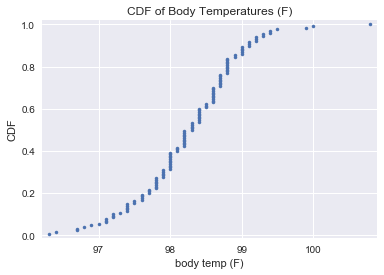

In [8]:
# plot observed cdf

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures (F)')

plt.margins(0.02)
plt.show()

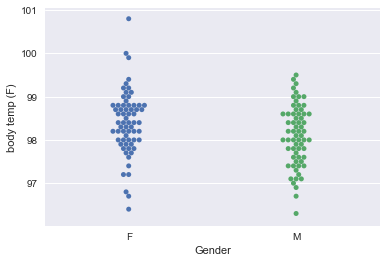

In [9]:
# swarm plot separating male and female

sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('body temp (F)')

plt.show()

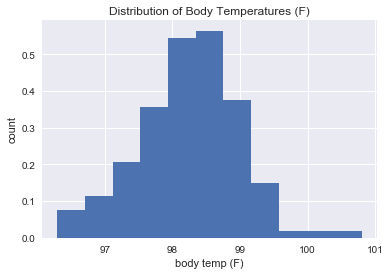

In [10]:
# histogram of all body temps

_ = plt.hist(df.temperature, bins=11, normed=True)
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Body Temperatures (F)')

plt.show()

In [11]:
# draw 10000 samples to visualize theoretical normal CDF around oberserved mean

experimental_temperature = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=10000)

x_exp, y_exp = ecdf(experimental_temperature)

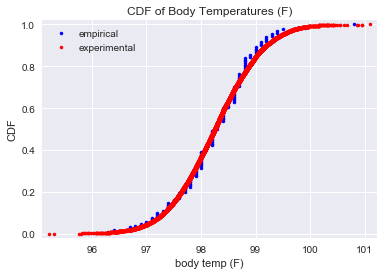

In [12]:
# plot observed CDF and experimental CDF together

# plot observed cdf

_ = plt.plot(x, y, marker='.', linestyle='none', color='blue', label='empirical')
_ = plt.plot(x_exp, y_exp, marker='.', linestyle='none', color='red', label='experimental')
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures (F)')
_ = plt.legend()

plt.margins(0.02)
plt.show()

#### Conclusion re: Distribution

Based upon the above-plotted histogram and the comparison between empirical CDF and simulated normal CDF, the empirical temperature data appears to be approximately normally distributed.  However, the simulated normal distribution shows more temperature values on the high side (i.e., greater than the mean) than the empirical CDF.  Therefore, the empirical temperatures are not exactly normally distributed.

# Question 2: is the sample size large and observations independent?

#### Size:

According to the central limit theorem (CLT), in order for a sample of independent and randomly selected observations to represent the population from which it is drawn, the sample must contain 30 or more observations.  In the case of the temperature data included here, the sample size is 130 observations.  Therefore, we can conclude that the sample size is sufficiently large for the CLT to hold.

#### Independence: 

The CLT also requires the samples to be randomly drawn and independent (i.e., the measure of one observation in the sample has no bearing on other observations in the sample).  In the present context, we are assuming the sample has been drawn at random and that the observations are independent, however, we need more information about how the sampling was conducted in order to draw firm conclusions.  

One way to test that the observations in the sample are truly random is to examine the proportion of observations that are from males versus females.  In this context, we assume that for a truly random sample, any observation has a 50% chance of being male or female.  Therefore, approximately half of the observations in our sample should be male and half should be female, assuming it is truly random.  

In [13]:
# calculate fraction of male observations and female observations

print(df.groupby('gender').count())

        temperature  heart_rate
gender                         
F                65          65
M                65          65


In [14]:
print("Male observations (%):", (65/130) * 100)
print("Female observations (%):", (65/130) * 100)

Male observations (%): 50.0
Female observations (%): 50.0


#### Conclusions re: Random Sampling

Although the % of male and female observations is exactly consistent with our expectations, however, the fact that it is exactly 50% male and 50% female is telling.  Because the split is exactly 50/50, it is possible that the sampling from the population was not entirely random and that, instead, the sample was intentionally drawn to include exactly 50% male and 50% female observations. 

# Question 3: is the true population mean really 98.6 degrees F?

In [15]:
# first, calculate the empirical (i.e., observed) mean value from our data

emp_mean = np.mean(df.temperature)

print('empirical mean:', emp_mean, "degrees F")

empirical mean: 98.24923076923078 degrees F


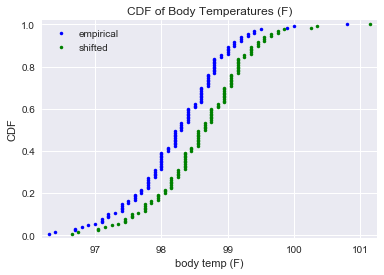

In [16]:
# next, since we are comparing a data set to a single statistic, we shift data set so the mean equals the statistic

test_mean = 98.6 # degrees F

df['shifted_temp'] = df.temperature - np.mean(df.temperature) + test_mean

# compute the CDF of the shifted_temp 

x_shift, y_shift = ecdf(df.shifted_temp)

# plot both CDFs (empirical and shifted) to visualize the shift

_ = plt.plot(x, y, marker='.', linestyle='none', color='blue', label='empirical')
_ = plt.plot(x_shift, y_shift, marker='.', linestyle='none', color='green', label='shifted')
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures (F)')
_ = plt.legend()

plt.margins(0.02)
plt.show()

<b>Null Hypothesis:</b> That the true mean human temperature from the population sampled is actually the established `test_mean` value of 98.6 degrees F.

In [17]:
# write functions for 1 sample bootstrap hypothesis test

def bootstrap_replicate_1d(data, func):
    """Draws a one-dimensional bootstrap replicate from data by applying func"""
    return func(np.random.choice(data, size=len(data)))
    
def draw_bs_reps(data, func, size=1):
    """Draws a number of bootstrap replicates equal to the given size parameter"""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# write function for calculating our test statistic - i.e., differene in means

def diff_from_value(data, value=test_mean):
    """Calculate the difference in mean of data from the given value"""
    return np.mean(data) - value

In [18]:
# calculate difference in empirical mean from the established test_mean value

observed_diff = emp_mean - test_mean
print("Observed difference in mean:", observed_diff)

Observed difference in mean: -0.35076923076921673


In [19]:
# draw 1000000 bootstrap sample replicates and calculate p-value

bs_replicates = draw_bs_reps(df.shifted_temp, diff_from_value, size=1000000)

p_value = np.sum(bs_replicates <= observed_diff) / len(bs_replicates)

print("p-value:", p_value)

p-value: 0.0


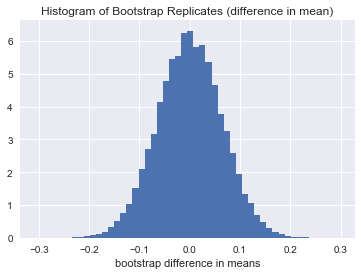

In [20]:
# plot histogram of bs_replicates

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('bootstrap difference in means')
_ = plt.title('Histogram of Bootstrap Replicates (difference in mean)')

plt.show()

#### Conclusion re: p-value of difference in means

Given the p-value of 0.0, we know that after 1 million bootstrap samples, not a single sample mean difference was as extreme as the `observed_diff` value of approximately -0.351.  Therefore, it is highly unlikely that the true mean human temperature of the population from which our sample was derived is 98.6 degrees F.